# Tennis Game

## Data Analyzing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm

class of coler


In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

make dataframe

In [3]:
GameInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/GameInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchAwayScoreInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchAwayScoreInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchAwayTeamInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchAwayTeamInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchEventInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchEventInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchHomeScoreInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchHomeScoreInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchHomeTeamInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchHomeTeamInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchRoundInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchRoundInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchSeasonInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchSeasonInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchTimeInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchTimeInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchTournamentInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchTournamentInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchVenueInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchVenueInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchVotesInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchVotesInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
OddsInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/OddsInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
PeriodInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/PeriodInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
PowerInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/PowerInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()


### 1. How many tennis players are included in the dataset?

#### Solution 1: Using Player ID

In [33]:
player_id = pd.concat([MatchAwayTeamInfo["player_id"], MatchHomeTeamInfo["player_id"]])
player_num = player_id.unique().size
print(color.GREEN+'The Total number of teniss players is' +color.END, player_num)

The Total number of teniss players is 2352


#### Solution 2: Using Player full name

In [34]:
player_full_name = pd.concat([MatchAwayTeamInfo["full_name"], MatchHomeTeamInfo["full_name"]])
player_num = player_full_name.unique().size
print(color.GREEN+'The Total number of teniss players is' +color.END, player_num)

The Total number of teniss players is 2353


### 2.  What is the average height of the players?


The Average height of players is 1.82


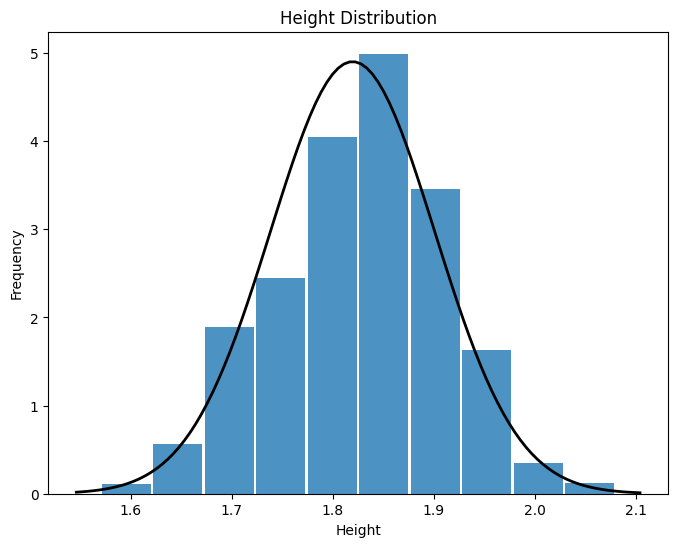

In [59]:
player_info = pd.concat([MatchAwayTeamInfo[["player_id", "height"]]
                        , MatchHomeTeamInfo[["player_id", "height"]]])

cleaned_player_info = player_info.dropna()
height_mean = cleaned_player_info['height'].mean().round(2)
print(color.PURPLE+ 'The Average height of players is' +color.END, height_mean)

# Plot
data = cleaned_player_info['height']

plt.figure(figsize=(8,6))
plt.hist(data, bins=10, density=True, alpha=0.8, rwidth=0.95)

mu, std = norm.fit(data) 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title ('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [60]:
# Shapiro-Wilk test
from scipy.stats import shapiro
statistic, p_value = shapiro(cleaned_player_info['height'])
print(f"Shapiro-Wilk Test for height: Statistic = {statistic}, p-value = {p_value}")
print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( "Height of Players is not normally distributed." )
else:
    print( "Therefore, Height of Players is normally distributed.")

Shapiro-Wilk Test for height: Statistic = 0.9897430040577953, p-value = 9.395131808959751e-27
T-statistic: 0.9897430040577953, p-value: 9.395131808959751e-27
Height of Players is not normally distributed.


d:\DATA_Analayses\Project\TennisGame\Tennisgameenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10448.
  res = hypotest_fun_out(*samples, **kwds)


### 3.  Which player has the highest number of wins?


Step 1: Merging required tables

In [66]:
merged_game_home = pd.merge(GameInfo, MatchHomeTeamInfo, on='match_id', suffixes=['_home']).drop_duplicates()
merged_game_away = pd.merge(GameInfo, MatchAwayTeamInfo, on='match_id', suffixes=['_away']).drop_duplicates()
# Ignore null values
home_game_wins = merged_game_home[merged_game_home['scoring'] == 1][['player_id', 'name']].copy()
away_game_wins = merged_game_away[merged_game_away['scoring'] == 2][['player_id', 'name']].copy()

# Concating home and away team wins
all_game_wins = pd.concat([home_game_wins, away_game_wins]).drop_duplicates()
all_game_wins.head()

,player_id,name
0,314519,Semenistaja D.
376,256104,Volynets K.
521,92074,Galán D.
675,213943,Osorio C.
884,202462,Malõgina E.


Step 2: Calculate the highest number of wins

In [67]:
win_game_counts = all_game_wins['player_id'].value_counts().reset_index()
win_game_counts.columns = ['player_id', 'wins']
player_names = all_game_wins[['player_id', 'name']].drop_duplicates()
win_counts = win_game_counts.merge(player_names, on='player_id')
top_player = win_counts.loc[win_counts['wins'].idxmax()]

print(color.CYAN+ 'Player with the highest number of wins is' +color.END, top_player['name'],
     color.CYAN+ 'with' +color.END, top_player['wins'],
      color.CYAN+ 'wins')

Player with the highest number of wins is Yunchaokete B. with 2 wins


### 4.  What is the longest match recorded in terms of duration?


Solution 1: Group by 

In [81]:
timestamp_table = (MatchTimeInfo.groupby(by="match_id")
                    .sum()
                    .drop(columns=['current_period_start_timestamp'])
                    .sum(axis=1).sort_values(ascending=False))

timestamp_table.idxmax()

time = pd.to_datetime(timestamp_table[timestamp_table.idxmax()], unit='s')

print(color.YELLOW+ 'Longest match recorded is for' +color.END,
        timestamp_table.idxmax(),   
        color.YELLOW+ 'match_id during' +color.END, time)

Longest match recorded is for 12300269 match_id during 1970-01-06 17:31:59


Solution 2: Pivote_table

In [82]:
timestamp = pd.pivot_table(data=MatchTimeInfo, values=['period_1', 'period_2', 'period_3', 'period_4', 'period_4'], aggfunc='sum', index='match_id')
timestamp.sum(axis=1).sort_values(ascending=False)
print(color.YELLOW+ 'Longest match recorded is for' +color.END,
        timestamp_table.idxmax(), color.YELLOW+ 'match_id during' +color.END,
        timestamp_table[timestamp_table.idxmax()])

Longest match recorded is for 12300269 match_id during 495119.0


### 5.	How many sets are typically played in a tennis match?

In [5]:
count_set_per_match = GameInfo.groupby('match_id')['set_id'].max().sort_values(ascending=False)
count_set_df = pd.DataFrame(count_set_per_match[count_set_per_match.values > 1].value_counts())
count_set_df['percentage'] = (count_set_df / count_set_df.sum())*100
count_set_df

# plot
labels = ['Set_2', 'Set_3', 'Set_4', 'Set_5']
fig = px.pie(
    count_set_df,
    values='percentage',
    names=labels ,
    title='Percentage of Sets Played in Matches',
    hole=0.3  # Optional: makes it a donut chart
)

# Customize the layout
fig.update_layout(
    width=400,
    height=400,
    margin=dict(l=20, r=20, t=40, b=20)  # Adjust the margins as needed
)
# Show the chart
fig.show()

### 6.	Which country has produced the most successful tennis players?

In [8]:
merged_game_home = pd.merge(GameInfo, MatchHomeTeamInfo, on='match_id',
                             suffixes=['_home']).drop_duplicates()

merged_game_away = pd.merge(GameInfo, MatchAwayTeamInfo, on='match_id',
                             suffixes=['_away']).drop_duplicates()

home_wins = merged_game_home[merged_game_home['scoring'] == 1][['player_id', 'name', 'country']].copy()
away_wins = merged_game_home[merged_game_home['scoring'] == 2][['player_id', 'name', 'country']].copy()

all_wins = pd.concat([home_wins, away_wins])

win_counts = all_wins['player_id'].value_counts().reset_index()
win_counts.columns = ['player_id', 'wins']

player_names = all_wins[['player_id', 'name', 'country']].drop_duplicates()
win_counts = win_counts.merge(player_names, on='player_id')

win_country = (win_counts.groupby(['country'])
               .count()['wins']
               .sort_values(ascending=False))


print(color.GREEN+ 'Most of wins belong to' +color.END,
       win_country.idxmax(),
        color.GREEN+ 'with' +color.END,
        win_country[win_country.idxmax()], color.GREEN+ 'wins')

Most of wins belong to USA with 161 wins


### 7.  What is the average number of aces per match?


In [9]:
aces_info = PeriodInfo[(PeriodInfo['statistic_name'] == 'aces') & (PeriodInfo['period'] == 'ALL')]
ace_count =pd.DataFrame(pd.pivot_table(aces_info, values=['statistic_name'],index='match_id', aggfunc='count'))
ace_avg = ace_count.sort_values('statistic_name',ascending=False).mean()[0]
print(color.PURPLE+ 'The average number of aces per match is' + color.END, ace_avg.round(2))

The average number of aces per match is 1.46


C:\Users\user\Oracel19c\admin\orcl\Temp\ipykernel_2220\575190203.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



### 8.	Is there a difference in the number of double faults based on gender?

gender
F    2528
M    2484
Name: statistic_name, dtype: int64

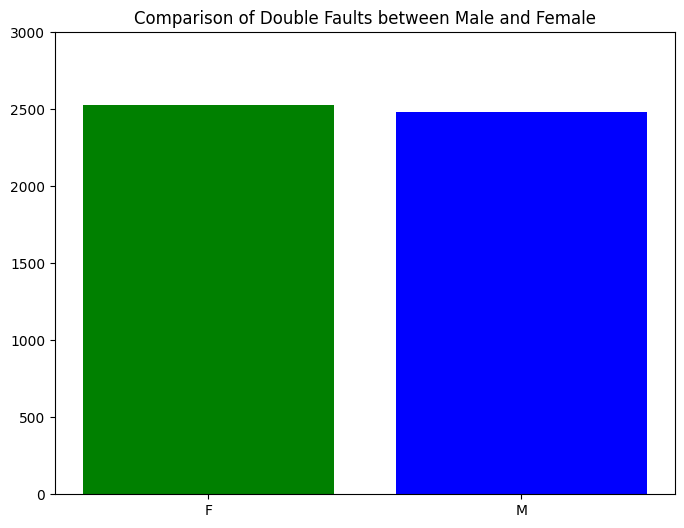

In [11]:
merged_gender_Team = pd.merge(MatchAwayTeamInfo, MatchHomeTeamInfo ,
                              on='match_id' ,
                              suffixes=('', '_Team'))

merged_gender_faults = pd.merge(PeriodInfo, merged_gender_Team,
                                on='match_id',
                                suffixes=('', '_faults'))

gender_faults = (merged_gender_faults[merged_gender_faults['statistic_name'] == 'double_faults']
                 [['match_id', 'statistic_name','gender']].copy())

gender_faults = gender_faults[['match_id', 'statistic_name','gender']].drop_duplicates()

double_faults = pd.Series(gender_faults.groupby('gender')["statistic_name"].count())
display (double_faults)

# plot
plt.figure(figsize=(8,6))
x = double_faults.index.tolist()
y = double_faults.values.tolist()
plt.bar(x, y, color=['green', 'blue'])
plt.ylim(0,3000)
plt.title ('Comparison of Double Faults between Male and Female')
plt.show()

### 9.  Which player has won the most tournaments in a single month?


In [13]:
merged_home = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=['_home'])
merged_away = pd.merge(MatchEventInfo, MatchAwayTeamInfo, on='match_id', suffixes=['_away'])

home_wins = merged_home[merged_home['winner_code'] == 1][['match_id','player_id', 'name']].copy()
away_wins = merged_away[merged_away['winner_code'] == 2][['match_id','player_id', 'name']].copy()

all_wins = pd.concat([home_wins, away_wins])
tournament_wins = pd.merge (all_wins, MatchTournamentInfo,
                            on='match_id',
                            suffixes=['_tournament'])

tournament_count = tournament_wins['tournament_id'].value_counts().reset_index

player_tournament_info = tournament_wins[['player_id', 'name', 'tournament_id']].drop_duplicates()
player_tournament_count =( player_tournament_info.groupby('player_id')
                          .agg(tournament_sum =('tournament_id','count'))
                          .sort_values('tournament_sum', ascending=False))
top_player_id = player_tournament_count.idxmax().values[0]
top_player_name = player_tournament_info[player_tournament_info['player_id'] == int(top_player_id)]['name'].unique()[0]
print(color.RED+ 'The player who won the most tournaments is' +color.END, top_player_name)

The player who won the most tournaments is Kuramochi M.


### 10. Is there a correlation between a player's height and their ranking?


There is a weak relationship between height and current rank.


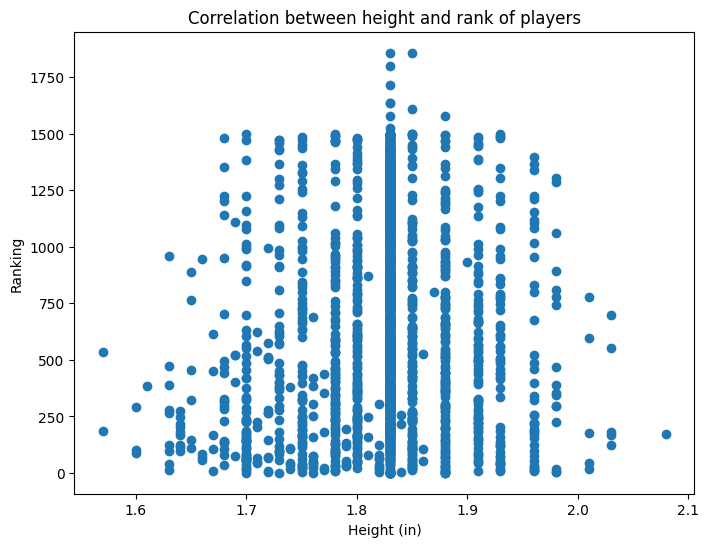

In [14]:
home_players = MatchHomeTeamInfo[["player_id", 'current_rank', "height"]]
away_players = MatchAwayTeamInfo[["player_id", 'current_rank', "height"]]
all_players = pd.concat([home_players, away_players])
cleaned_all_players = all_players.drop_duplicates(subset=['player_id'])
height_mode = float(cleaned_all_players['height'].mode().iloc[0])
cleaned_all_players = cleaned_all_players.fillna(value = height_mode)

x = cleaned_all_players['height']
y = cleaned_all_players['current_rank']
correlation = x.corr(y)
if abs(correlation) > 0.5:
    print("There is a strong relationship between height and current rank.")
elif abs(correlation) > 0.3:
    print("There is a moderate relationship between height and current rank.")
else:
    print("There is a weak relationship between height and current rank.")


# Plot
plt.figure(figsize=(8,6))
plt.scatter (x,y)
plt.title('Correlation between height and rank of players')
plt.xlabel('Height (in)')
plt.ylabel('Ranking')
plt.show()

### 11.	What is the average duration of matches?

In [15]:
time_sum =(pd.DataFrame(pd.pivot_table(MatchTimeInfo, 
                                       values=['period_1','period_2', 'period_3','period_4','period_5'],
                                       index=['match_id'], 
                                       aggfunc='sum')))

time_sum.loc[(time_sum==0).all(axis=1)]
time_sum['Total'] = time_sum.sum(axis=1)
time_mean =time_sum['Total'].mean()
print(color.CYAN+ 'The average duration of matches is' +color.END, time_mean.round(2))

The average duration of matches is 9460.05


### 12. What is the average number of games per set in men's matches compared to women's matches?


In [18]:
merge_game_gender = pd.concat([GameInfo[['match_id','set_id','game_id']],
                               merged_gender_Team[['match_id','gender']]])

merge_game_gender.reset_index(inplace=True)

merge_game_gender.drop_duplicates().sort_values("match_id")
match_id= merge_game_gender['match_id'].unique()

match_id_nan_notna =[]
for i in range(match_id.size):
    nullcount_gender = merge_game_gender[merge_game_gender["match_id"]==match_id[i]]["gender"].isna().sum()
    nanullcount_gender = merge_game_gender[merge_game_gender["match_id"]==match_id[i]]["gender"].notna().sum()
    if nullcount_gender != 0:
        if nanullcount_gender !=0:
            match_id_nan_notna.append(i)
match_id_nan_notna = pd.Series(match_id_nan_notna)

for i in match_id_nan_notna:
    merge_game_gender[merge_game_gender["match_id"]==match_id[i]] = (merge_game_gender[merge_game_gender["match_id"]==match_id[i]]
                                                                     .sort_values("gender")
                                                                     .ffill())

pd.options.mode.copy_on_write = True 

cleaned_set_per_Gender = merge_game_gender.drop_duplicates(subset=['match_id'])

replace_nan = (cleaned_set_per_Gender['gender'].mode().iloc[0])

cleaned_set_per_Gender['gender'] = cleaned_set_per_Gender['gender'].fillna(replace_nan)
cleaned_set_per_Gender = cleaned_set_per_Gender.dropna(subset='set_id')

cleaned_set_per_Gender

mean_game_per_set = (pd.pivot_table(cleaned_set_per_Gender,
                                    values= ['game_id'],
                                    index=['gender'],
                                    columns=['set_id'],
                                    aggfunc='mean')).round(2)

mean_game_per_set = mean_game_per_set.fillna(0)
mean_game_per_set

game_id                        
set_id     1.0   2.0   3.0   4.0   5.0
gender                                
F         6.65  8.62  7.63  0.00   0.0
M         7.21  9.13  9.23  9.28  10.1

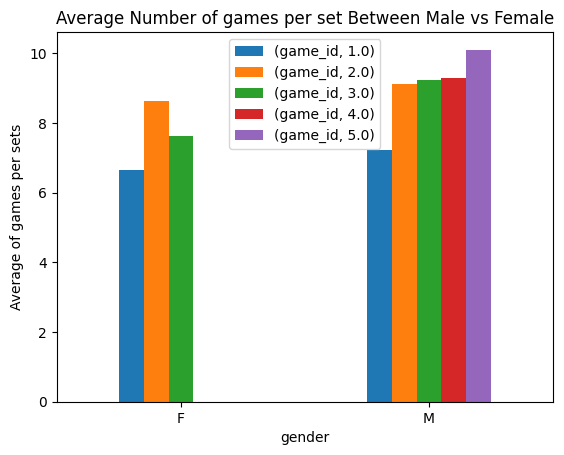

In [21]:
# Plot
labels=['set_1', 'set_2', 'set_3', 'set_4', 'set_5']
mean_game_per_set.plot.bar(rot=0 ).legend(loc=9)  
plt.title('Average Number of games per set Between Male vs Female')
plt.ylabel('Average of games per sets')
plt.show()

### 13.	What is the distribution of left-handed versus right-handed players?

,player_id,percentage (%)
plays,,
ambidextrous,1,0.04
left-handed,120,5.10
right-handed,2231,94.86


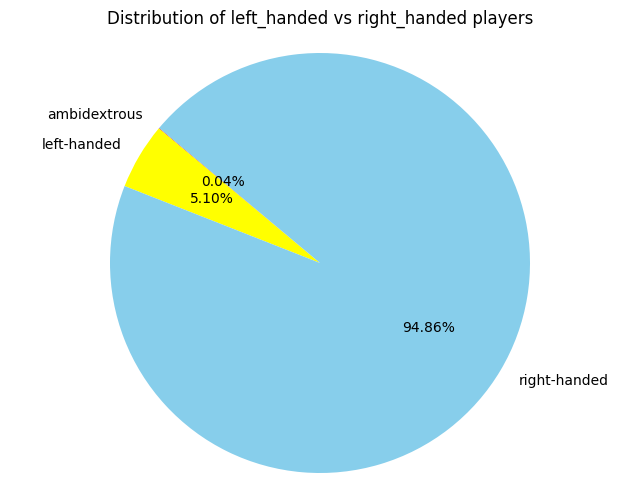

In [22]:
home_players = MatchHomeTeamInfo[["player_id", 'plays']]
away_players = MatchAwayTeamInfo[["player_id", 'plays']]

all_players = pd.concat([home_players, away_players]).drop_duplicates('player_id')
plays_mode = all_players['plays'].mode().iloc[0]
all_players = all_players.fillna(value = plays_mode)


hand_table = all_players.groupby('plays').count()
hand_table['percentage (%)'] = ((hand_table / hand_table['player_id'].sum())*100).round(2)
display(hand_table)

# Plot
labels = hand_table.index.tolist()
data = hand_table['percentage (%)']
plt.figure(figsize=(8,6))
plt.pie(x=data, labels=labels, autopct = '%1.2f%%', startangle=140, colors=['red', 'yellow', 'skyblue'])
plt.title ('Distribution of left_handed vs right_handed players')
plt.axis('equal')
plt.show()

### 14.	What is the most common type of surface used in tournaments?

In [23]:
MatchTournamentInfo = MatchTournamentInfo.drop_duplicates('tournament_id')
ground_type = MatchTournamentInfo.groupby('ground_type')['tournament_id'].count()
print(f'The most common type of surface used is: {ground_type.idxmax()}')
display (ground_type)

# plot
colors = ['green', 'red', 'yellow', 'blue']
fig = px.pie(
    ground_type ,
    values= ground_type.values ,
    names=ground_type.index ,
    title='Tennis Ground Types distribution',
    hole=0.3  # Optional: makes it a donut chart
)

# Customize the layout
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    width=400,
    height=400,
    margin=dict(l=20, r=20, t=40, b=20)  # Adjust the margins as needed
)
# Show the chart
fig.show()


The most common type of surface used is: Red clay


ground_type
Hardcourt indoor       4
Hardcourt outdoor     76
Red clay             213
Synthetic outdoor      2
Name: tournament_id, dtype: int64

### 15.	How many distinct countries are represented in the dataset?

In [24]:
country_table1 = pd.concat (([MatchAwayTeamInfo["country"], MatchHomeTeamInfo["country"]]))
country_table_all = pd.concat((country_table1, MatchVenueInfo['country']))
country_table_all.unique()
print(color.DARKCYAN+ "Total number of distinct countries in dataset is" +color.END, country_table_all.unique().size)

Total number of distinct countries in dataset is 100


### 16.	Which player has the highest winning percentage against top 10 ranked opponents?

Step 1: Finding top 10 Players

In [25]:
all_player_with_match_id = (pd.concat([MatchHomeTeamInfo, MatchAwayTeamInfo],
                           ignore_index=True)
                           .sort_values("current_rank", ascending=False)
                           .drop_duplicates(subset=["match_id", "player_id"]))

all_player_with_need_columns = (all_player_with_match_id[["full_name","match_id", "player_id", "current_rank"]]
                               .sort_values(["current_rank", "full_name"], ascending=False, ignore_index=True))

all_player_unique = (all_player_with_need_columns.drop_duplicates("player_id", ignore_index=True)
                    .drop("match_id", axis=1))

top_ten_palyers = (all_player_unique[all_player_unique["current_rank"]
                                    .isin(all_player_unique["current_rank"]
                                    .nlargest(n=10))])
top_ten_palyers

,full_name,player_id,current_rank
0,"Rocens, Martins",236825,1858.0
1,"Amoros Ramos, Pol",152830,1858.0
2,"Stenberg, Jonathan",97381,1800.0
3,"Hsu, Jeffrey Chuan En",171072,1717.0
4,"Zhzhenov, Konstantin",377531,1635.0
5,"Marques, Diogo",221382,1635.0
6,"Bathrinath, Lohithaksha",339989,1611.0
7,"Vatteroni, Lorenzo",253830,1578.0
8,"De Vincentis, Matteo",166096,1578.0
9,"Stoica, Vlad",203673,1525.0


Step 2: Merging tables

In [26]:
match_between_two_player = (all_player_with_need_columns.pivot_table
                           (index="match_id",
                            columns=all_player_with_need_columns.groupby("match_id").cumcount(),
                            values="player_id",
                            aggfunc='first').add_prefix("player")
                            .reset_index())

match_home = MatchHomeTeamInfo[["match_id", "player_id", "current_rank", "full_name"]]
match_away = MatchAwayTeamInfo[["match_id", "player_id", "current_rank", "full_name"]]
match_winner = MatchEventInfo[["match_id", "winner_code"]]


match_winner_home_player_id = pd.merge(match_home, match_winner, how="right" ).drop_duplicates()
match_winner_away_player_id = pd.merge(match_home, match_winner, how="right" ).drop_duplicates()

match_winner_player_id = pd.concat([match_winner_home_player_id, match_winner_away_player_id])

winner_player = match_winner_player_id[match_winner_player_id["winner_code"] == 2]

winner_in_each_match = pd.merge(match_between_two_player, winner_player)

series_of_match_id_top_player_played = (all_player_with_need_columns
                                        [all_player_with_need_columns["player_id"]
                                         .isin(top_ten_palyers["player_id"])]
                                         ["match_id"])

winer_in_each_match_top_player_played = (winner_in_each_match[winner_in_each_match["match_id"]
                                                             .isin(series_of_match_id_top_player_played)]).dropna(axis=0)
who_win_from_top_ten = (winer_in_each_match_top_player_played
                        [~(winer_in_each_match_top_player_played["player_id"]
                           .isin(top_ten_palyers["player_id"]))])
best_palayer_in_playe_top_ten = (who_win_from_top_ten.groupby("player_id")["winner_code"]
                                 .agg("count").reset_index()
                                 .sort_values("winner_code",ascending=False))
top_player = all_player_unique[all_player_unique["player_id"] == int(best_palayer_in_playe_top_ten.iloc[0]["player_id"])]
top_player


,full_name,player_id,current_rank
538,"Han, Seon Yong",196408,1146.0


### 17. What is the average number of breaks of serve per match?


In [53]:
GameInfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 753648 entries, 0 to 1394914
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   match_id           753648 non-null  int64 
 1   set_id             753648 non-null  int64 
 2   game_id            753648 non-null  int64 
 3   point_id           753648 non-null  int64 
 4   home_point         753648 non-null  object
 5   away_point         753648 non-null  object
 6   point_description  753648 non-null  int64 
 7   home_point_type    753648 non-null  int64 
 8   away_point_type    753648 non-null  int64 
 9   home_score         753648 non-null  int64 
 10  away_score         753648 non-null  int64 
 11  serving            753648 non-null  int64 
 12  scoring            753648 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 80.5+ MB


In [55]:
GameInfo[(GameInfo["scoring"]==2) & (GameInfo["match_id"]==12301140)].count()

match_id             79
set_id               79
game_id              79
point_id             79
home_point           79
away_point           79
point_description    79
home_point_type      79
away_point_type      79
home_score           79
away_score           79
serving              79
scoring              79
dtype: int64

In [47]:
GameInfo[GameInfo["match_id"]==12301140].uni

,match_id,set_id,game_id,point_id,home_point,away_point,point_description,home_point_type,away_point_type,home_score,away_score,serving,scoring
0,12301140,3,8,0,15,0,0,1,5,6,2,1,1
1,12301140,3,8,1,30,0,0,1,5,6,2,1,1
2,12301140,3,8,2,30,15,0,5,1,6,2,1,1
3,12301140,3,8,3,40,15,0,3,5,6,2,1,1
4,12301140,3,8,4,40,30,0,3,1,6,2,1,1
5,12301140,3,8,5,40,40,0,5,1,6,2,1,1
6,12301140,3,8,6,40,A,0,5,2,6,2,1,1
7,12301140,3,8,7,40,40,0,1,5,6,2,1,1
8,12301140,3,8,8,A,40,0,3,5,6,2,1,1
9,12301140,3,8,9,40,40,0,5,1,6,2,1,1


# -------- Extra Questions ---------

### 18. The proportion of countries represented by the top 100 tennis players

,player_id,full_name,gender,current_rank,country
7393,152830,"Amoros Ramos, Pol",M,1858.0,Spain
1852,236825,"Rocens, Martins",M,1858.0,Latvia
758,97381,"Stenberg, Jonathan",M,1800.0,Sweden
1547,171072,"Hsu, Jeffrey Chuan En",M,1717.0,Chinese Taipei
515,377531,"Zhzhenov, Konstantin",M,1635.0,Russia
...,...,...,...,...,...
3652,232087,"Bergen, Mariia",F,NaN,Ukraine
4320,151258,"Jang, Eun Se",F,NaN,South Korea
7576,196406,"Shannan Zayid, Mubarak",M,NaN,Qatar
9709,267623,"Garcia, Raul",M,NaN,Bolivia


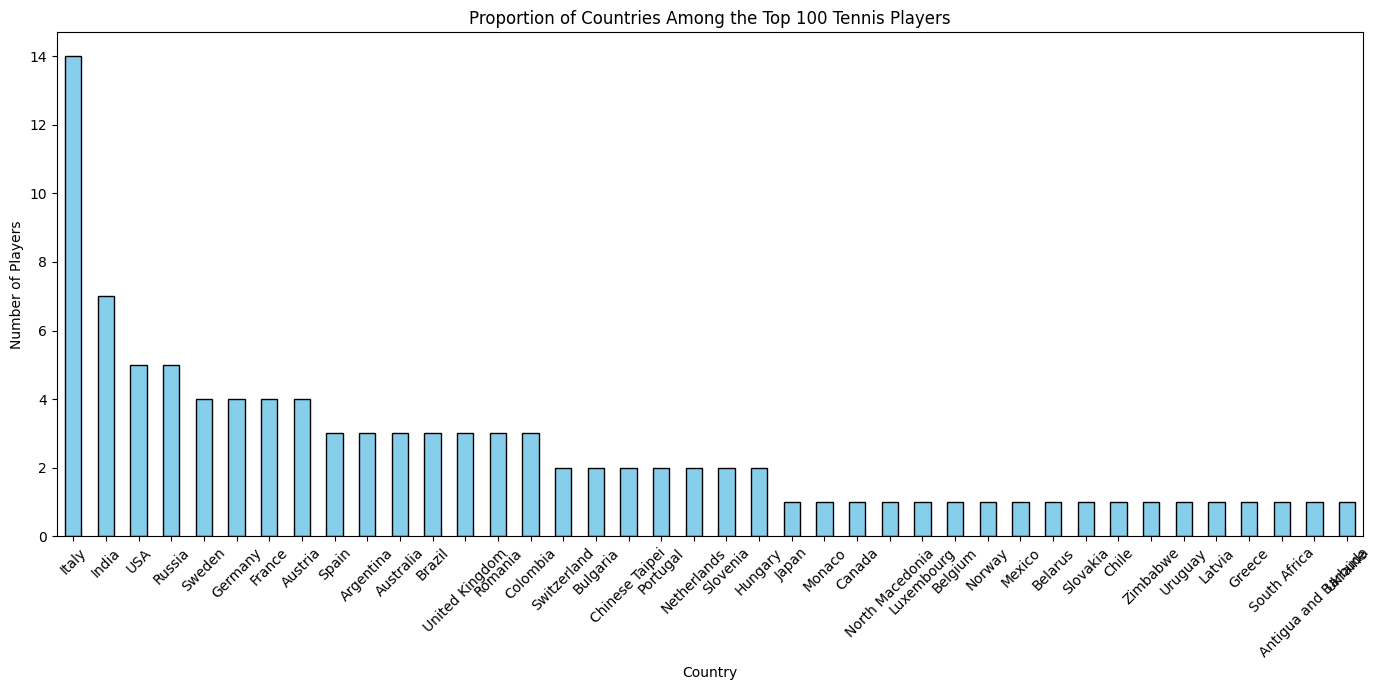

In [29]:
# Combine home and away team info to get a list of all players
players_df = pd.concat([MatchHomeTeamInfo[['player_id', 'full_name','gender', 'current_rank', 'country']], 
                        MatchAwayTeamInfo[['player_id', 'full_name','gender' ,'current_rank', 'country']]])

# Remove duplicates and sort by rank
players_df = players_df.drop_duplicates(subset=['player_id']).sort_values(by='current_rank' ,ascending=False)
display(players_df)
# Filter the top 100 players
top_100_players = players_df.head(100)

# Count the number of players from each country
country_counts = top_100_players['country'].value_counts()

# Plot the proportions of countries
plt.figure(figsize=(14, 7))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Proportion of Countries Among the Top 100 Tennis Players')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 19. What proportion of the predictions became real ??

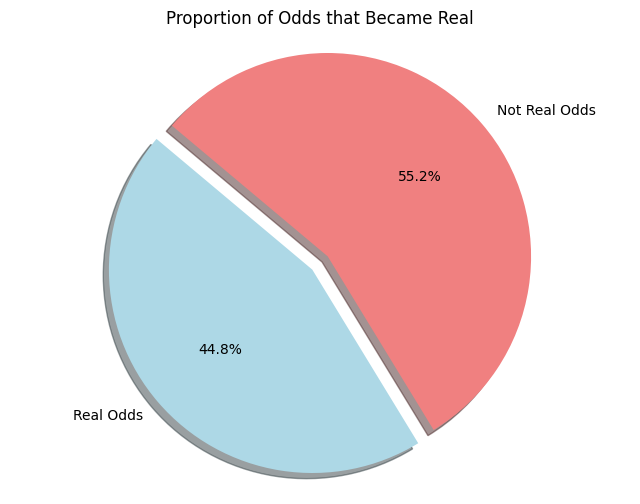

In [30]:
real_odds_count = OddsInfo['winnig'].sum()
not_real_odds_count = len(OddsInfo) - real_odds_count

# Plotting the pie chart
labels = ['Real Odds', 'Not Real Odds']
sizes = [real_odds_count, not_real_odds_count]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Real Odds)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Proportion of Odds that Became Real')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 20. Comparison the performance of players in different rounds by gender

In [32]:
merged_game_home = pd.merge(GameInfo, MatchHomeTeamInfo, on='match_id', suffixes=['_home']).drop_duplicates()
merged_game_away = pd.merge(GameInfo, MatchAwayTeamInfo, on='match_id', suffixes=['_away']).drop_duplicates()
# Ignore null values
home_game_wins = merged_game_home[merged_game_home['scoring'] == 1][['match_id','player_id', 'full_name']].copy()
away_game_wins = merged_game_away[merged_game_away['scoring'] == 2][['match_id','player_id', 'full_name']].copy()

# Concating home and away team wins
all_game_wins = pd.concat([home_game_wins, away_game_wins]).drop_duplicates()
winnersBYGender = pd.merge(players_df[['full_name' , 'gender']] , all_game_wins, on='full_name')
winners_with_rounds= pd.merge(winnersBYGender , MatchRoundInfo[[ 'match_id', 'name']], on='match_id')


hand_gender_counts = winners_with_rounds.groupby(['name', 'gender']).size().unstack(fill_value=0)
# Plotting
hand_gender_counts.plot(kind='bar', stacked=False)

# Adding labels and title
plt.xlabel('Rounds')
plt.ylabel('Number of Players')
plt.title('player performances')
plt.legend(title='Gender')
plt.show()

NameError: name 'players_df' is not defined

### 21. What kind of Tournaments have been held in each country?

In [32]:
# Sample data similar to the description
Countries_with_Tournaments = pd.merge( MatchVenueInfo[['match_id' , 'country']] , MatchTournamentInfo[['match_id','tournament_category_name']] ,  on='match_id')
Countries_with_Tournaments.columns
tournament_counts = Countries_with_Tournaments.groupby(['country', 'tournament_category_name']).size().unstack(fill_value=0).reset_index()

tournament_counts_long = tournament_counts.melt(id_vars=['country'], var_name='Tournament Name', value_name='Number of Tournaments')

# Create the stacked bar plot using Plotly
fig = px.bar(
    tournament_counts_long,
    x='country',
    y='Number of Tournaments',
    color='Tournament Name',
    title='Tournaments Held in Each Country',
    labels={'Number of Tournaments': 'Number of Tournaments', 'country': 'Country'},
    height=500,
    width=800
)


# Customize the layout for a more modern look
fig.update_layout(
    title={
        'text': 'Tournaments Held in Each Country',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend_title_text='Tournament Name',
    legend=dict(
        orientation="v",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    barmode='stack',
    xaxis_title='Country',
    yaxis_title='Number of Tournaments'
)

# Save the chart to an HTML file
fig.write_html("tournaments_held_in_each_country.html")

# Output message to inform the user
print("The chart has been saved to 'tournaments_held_in_each_country.html'. Open this file in a web browser to view the chart.")
fig.show()

The chart has been saved to 'tournaments_held_in_each_country.html'. Open this file in a web browser to view the chart.


### 22. Comback : How often does the player win the match after losing the first point?

In [33]:
# table for set1, game 1 and point 1
comeback_table = GameInfo[(GameInfo['set_id'] == 1) & (GameInfo['game_id'] == 1) & (GameInfo['point_id'] == 0)].drop(columns=['point_description','home_point_type', 'away_point_type', 'home_score', 'away_score', 'serving' ])

# change dtype from object to int
comeback_table[['home_point', 'away_point']] = comeback_table[['home_point', 'away_point']].astype(int)

# 1: home gets the first point
# 2: away gets the first point
comeback_table['first_point_win'] = np.where(comeback_table['home_point'] == 0, 2, 1)



# 1 : first point and final result the same
# 0: first point and final result not the same
comeback_table['final_result'] = np.where(comeback_table['scoring'] == comeback_table['first_point_win'], 1, 0)

# The percentage of comebacks
comeback_table_count = pd.DataFrame(comeback_table.groupby('final_result')['match_id'].count())
comeback_table_count['percentage'] = ((comeback_table_count / comeback_table_count.sum())*100).round(2)
display(comeback_table_count)
print('In 66% of matches, the player gets the first point win the match')

# plot
colors = ['green', 'yellow']
fig = px.pie(
    comeback_table_count ,
    values= comeback_table_count['percentage'] ,
    names=['Lose', 'Win'] ,
    title='Comeback after loosing first point',
    hole=0.3  # Optional: makes it a donut chart
)

# Customize the layout
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    width=400,
    height=400,
    margin=dict(l=20, r=20, t=40, b=20)  # Adjust the margins as needed
)
# Show the chart
fig.show()


,match_id,percentage
final_result,,
0,2180,33.26
1,4375,66.74


In 66% of matches, the player gets the first point win the match


### 23. Most tournaments are held in which cities of the most popular host country?

In [34]:
""" finding the most popular country """
Countries_with_Tournaments = pd.merge( MatchVenueInfo[['match_id' , 'country']] , MatchTournamentInfo[['match_id','tournament_category_name']] ,  on='match_id')
tour_count = Countries_with_Tournaments.groupby(['country', 'tournament_category_name']).size().unstack(fill_value=0)
totalMatches = tour_count.groupby('country').sum().sum(axis=1).sort_values(ascending=False)
most_popular_country = totalMatches.idxmax()
print (f"the most popular host country is : {most_popular_country}")
"""now calculating the mathces in each of the cities of the popular country """
popular_matches = MatchVenueInfo[MatchVenueInfo['country'] == most_popular_country]
grouped_cities =(popular_matches.groupby('city' ,as_index= False)
                 .agg(totalPlayes = ('match_id','count'))
                 .sort_values('totalPlayes', ascending=False))
grouped_cities

the most popular host country is : Italy


,city,totalPlayes
8,Rome,266
2,Cervia,59
0,Brescia,56
7,Reggio Emilia,55
11,Vicenza,52
3,Francavilla al Mare,51
5,Grado,47
9,Santa Margherita Di Pula,42
10,Turin,39
6,Parma,37


### 23. What is the Average number of Serves per match?

Average servis per match is 113.535


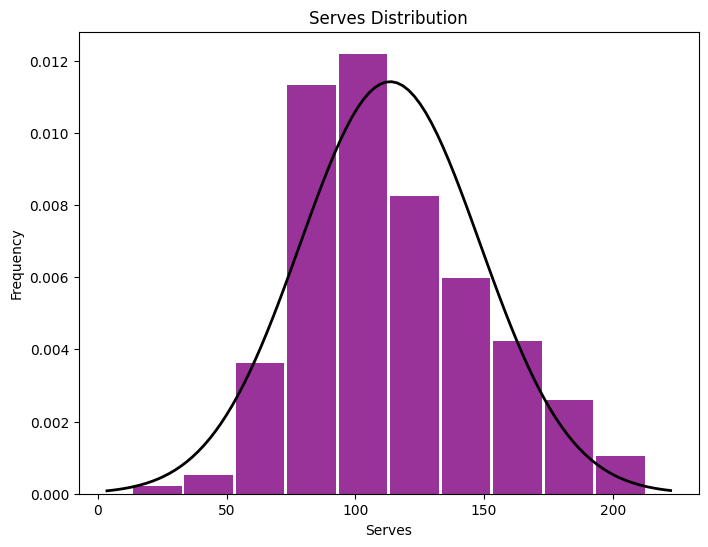

In [44]:
point_each_game = (GameInfo[["match_id", "set_id", "home_point", "away_point", "scoring"]]
                   .groupby("match_id")["scoring"].count()
                   .sort_values(ascending=False))

Q1 = point_each_game.quantile(0.25)
Q3 = point_each_game.quantile(0.75)
IQR = Q3 - Q1

point_each_game_cleaned = (point_each_game[~((point_each_game < (Q1 - 1.5 * IQR)) 
                                            |
                                            (point_each_game > (Q3 + 1.5 * IQR)))])

print(color.GREEN+ 'Average servis per match is' +color.END, point_each_game_cleaned.mean().round(3))



# plot
data = point_each_game_cleaned.values
plt.figure(figsize=(8,6))
plt.hist(data, bins=10, density=True, alpha=0.8, rwidth=0.95, color='purple')
plt.title ('Serves Distribution')
plt.xlabel('Serves')
plt.ylabel('Frequency')
plt.show()